# Taller 1 - Ciencia de Datos Aplicada

Juan Diego Ospina Aguirre - 201814547
  
**Dataset:** AirBnb Listings - Barcelona, España [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Mexico City. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. Imagine you're a consultant for individuals or firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2023

In [92]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import seaborn as sns
import os

In [6]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Carga de la data

In [9]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./data/listings.csv.gz")

## 2. Entendimiento de los datos

In [10]:
# Showing dataframe dimensions
listings_df.shape

(17230, 75)

In [11]:
# Showing column types
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [13]:
listings_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
8742,42506993,https://www.airbnb.com/rooms/42506993,20230610001920,2023-06-10,city scrape,Rental unit in Barcelona · ★4.23 · 1 bedroom ·...,Apartamento duplex de 50m2 ubicado en la plant...,Castellano<br />El emblemático Barrio de Sants...,https://a0.muscache.com/pictures/4b55ef7e-31a3...,335838676,https://www.airbnb.com/users/show/335838676,Vale Y Pere,2020-02-13,"Barcelona, Spain","somos arquitectos , vivimos en nuestra amada B...",within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/b3ca0...,https://a0.muscache.com/im/pictures/user/b3ca0...,NaN,9.0,9.0,"['email', 'phone']",t,t,"Barcelona, Catalunya, Spain",Sants - Badal,Sants-Montjuïc,41.374338,2.123817,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Portable air conditioning"", ""Fire extinguish...",$60.00,32,1125,32.0,32.0,1125.0,1125.0,32.0,1125.0,NaN,t,10,40,70,344,2023-06-10,13,5,0,2020-10-01,2023-04-08,4.23,4.38,4.31,4.54,4.77,4.77,4.08,Exempt,t,7,7,0,0,0.40
11778,562292629831307027,https://www.airbnb.com/rooms/562292629831307027,20230610001920,2023-06-10,previous scrape,Hotel in Barcelona · ★4.83 · 1 bedroom · 2 bed...,Twin Room (2 single beds) for 2 people (1 chil...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2830568,https://www.airbnb.com/users/show/2830568,Hostal,2012-07-04,"Barcelona, Spain",Hola! Si necesitas cualquier información respe...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/cb734...,https://a0.muscache.com/im/pictures/user/cb734...,NaN,5.0,6.0,"['email', 'phone']",t,t,NaN,el Raval,Ciutat Vella,41.381880,2.172030,Room in hotel,Private room,2,NaN,1 private bath,1.0,2.0,"[""Fire extinguisher"", ""Air conditioning"", ""Wif...",$175.00,1,365,1.0,10.0,365.0,365.0,1.9,365.0,NaN,t,6,21,41,308,2023-06-10,6,4,0,2022-04-15,2023-02-16,4.83,4.67,4.83,4.83,4.67,5.00,4.50,HB-003960,t,5,0,5,0,0.43
3088,14228057,https://www.airbnb.com/rooms/14228057,20230610001920,2023-06-10,previous scrape,Rental unit in Barcelona · ★4.77 · 1 bedroom ·...,IDEAL FOR A BARCELONA FANS. Cozy and spacius r...,The advantages of being 50 meters from the Cam...,https://a0.muscache.com/pictures/2a8823e7-73fe...,80649742,https://www.airbnb.com/users/show/80649742,Javier,2016-06-29,"Barcelona, Spain",Ciudadano del mundo. Me gustaría que no hubier...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/user/9d7f7...,https://a0.muscache.com/im/pictures/user/9d7f7...,La Maternitat i Sant Ramon,2.0,2.0,"['email', 'phone']",t,t,"Barcelona, Catalunya, Spain",la Maternitat i Sant Ramon,Les Corts,41.378200,2.125060,Private room in rental unit,Private room,2,NaN,1 bath,NaN,1.0,"[""Kitchen"", ""Hangers"", ""Hair dryer"", ""Wifi"", ""...",$47.00,1,

In [14]:
# Showing the number of unique values of listing ids
listings_df["id"].nunique()

17230

Lo anterior nos permite determinar que el data set no tiene registros duplicados, dado que el número de registros únicos de ids es el mismo que el número de filas del data set.

In [18]:
# Showing unique values of neighbourhoods
listings_df["neighbourhood_cleansed"].unique()

array(['la Sagrada Família', 'el Besòs i el Maresme',
       "el Camp d'en Grassot i Gràcia Nova",
       'Sant Pere, Santa Caterina i la Ribera', 'el Barri Gòtic',
       'la Barceloneta', "la Dreta de l'Eixample",
       'Vallcarca i els Penitents', 'el Raval', 'Sant Antoni',
       'el Fort Pienc', 'el Poblenou', 'la Vila Olímpica del Poblenou',
       'Vallvidrera, el Tibidabo i les Planes', 'Sants', 'el Clot',
       'el Poble Sec', 'la Vila de Gràcia', 'la Font de la Guatlla',
       "la Nova Esquerra de l'Eixample",
       'Diagonal Mar i el Front Marítim del Poblenou', 'Pedralbes',
       'el Guinardó', "l'Antiga Esquerra de l'Eixample", 'el Coll',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Sant Martí de Provençals', 'Navas', "el Camp de l'Arpa del Clot",
       'Sarrià', 'el Parc i la Llacuna del Poblenou', 'Sants - Badal',
       'el Baix Guinardó', 'el Congrés i els Indians', 'Torre Baró',
       'la Prosperitat', 'el Turó de la Peira', 'Provençals del 

In [19]:
len(listings_df["neighbourhood_cleansed"].unique())

70

Todas las propiedades están distribuidas en 70 barrios, el cual es un número bastante, sin embargo, más adelante veremos en cuántos barrios está distribuido el pareto o la mayoría de las propiedades.

## 3. Análisis univariado

In [20]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True)

Entire home/apt    0.595589
Private room       0.387406
Shared room        0.008706
Hotel room         0.008299
Name: room_type, dtype: float64

Este primer indicador nos permite determinar que la mayoría de propiedades son apartamentos o casas completas, junto con habitaciones privadas. Lo anterior nos puede indicar que quizás este tipo de propiedades serían una mejor inversión porque quizás los otros tipos no son rentables y por eso no hay casi propiedades de este tipo; aunque por otro lado, no necesariamente este tipo de propiedad es la mejor, una propiedad como habitación compartida o de hotel también pueden ser buenas opciones si hablamos en términos de demanda.

In [24]:
# Calculating basic statistics of accommodates
listings_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    17230.000000
mean         3.409460
std          2.145476
min          0.000000
5%           1.000000
25%          2.000000
50%          3.000000
75%          4.000000
95%          7.000000
max         16.000000
Name: accommodates, dtype: float64

In [25]:
listings_df[listings_df["accommodates"] == 0.0]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
9254,44345400,https://www.airbnb.com/rooms/44345400,20230610001920,2023-06-10,previous scrape,Aparthotel in Barcelona · Studio,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,357768035,https://www.airbnb.com/users/show/357768035,Citadines Ramblas,2020-07-22,"Barcelona, Spain",NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/user/2bc61...,https://a0.muscache.com/im/pictures/user/2bc61...,NaN,4.0,5.0,"['email', 'phone']",t,t,NaN,el Barri Gòtic,Ciutat Vella,41.38382,2.17146,Room in aparthotel,Hotel room,0,NaN,NaN,NaN,NaN,"[""Fire extinguisher"", ""Pets allowed"", ""Refrige...",$0.00,1,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,0,0,0,0,2023-06-10,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN


El anterior análisis nos permite determinar que en promedio, las propiedades tienen capacidad para 3-4 huespedes. Aparace, que el valor mínimo de huespedes es de 0, al hacer la búsqueda de las propiedades que cumplen esta condición, vemos que es sólo una, que además no tiene disponibilidad ni precio y que nunca ha tenido reviews, lo que nos puede indicar que es probable que esta propiedad nunca haya estado disponible y/o que el huesped no haya terminado de completar la información.

In [31]:
# Calculating basic statistics of price
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)
listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    17230.000000
mean       177.689959
std        876.724391
min          0.000000
5%          25.000000
25%         55.000000
50%        111.000000
75%        214.000000
95%        427.000000
max      90000.000000
Name: price_float, dtype: float64

Al hacer el análisis de cuartiles para la variable de precio, nos damos cuenta de que hay una gran variación entre los valores, el valor máximo registrado es de 90.000 euros lo que claramente puede ser un outlier, es por esto que aplicaremos la regla de 1.5 para poder hacer un mejor análisis.

In [32]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

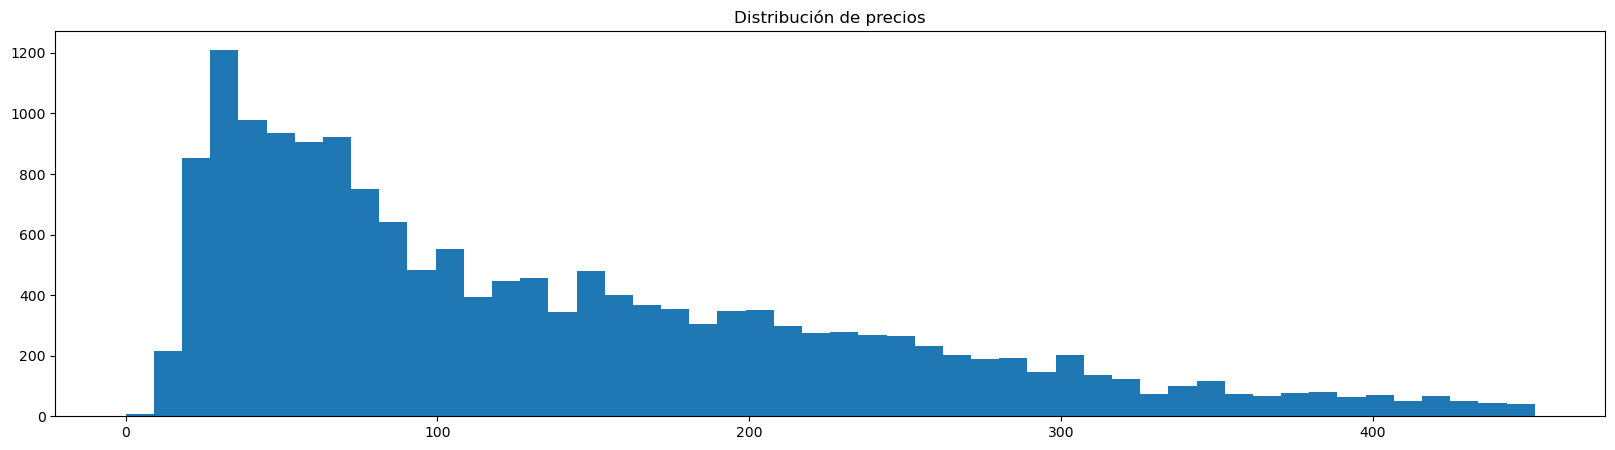

In [38]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Distribución de precios")
plt.plot()

In [37]:
# Calculating basic statistics of number of reviwes
listings_df["number_of_reviews"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    17230.000000
mean        42.310215
std         83.509961
min          0.000000
5%           0.000000
25%          1.000000
50%          7.000000
75%         43.000000
95%        214.000000
max       1751.000000
Name: number_of_reviews, dtype: float64

[]

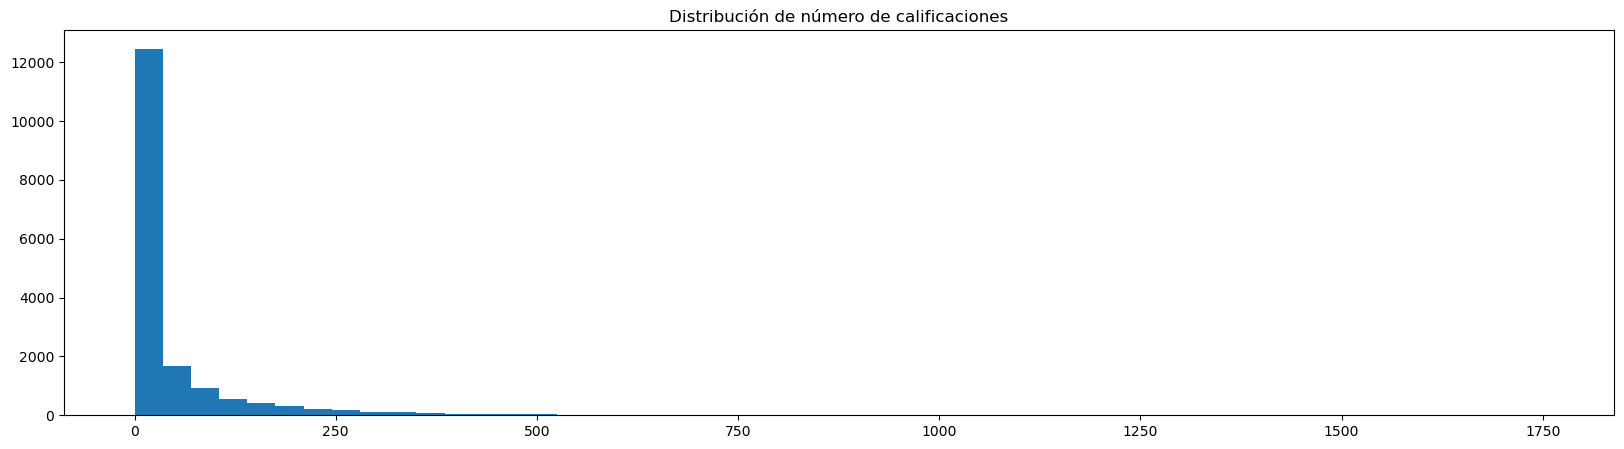

In [43]:
# Plotting a histogram for number of reviews
plt.figure(figsize=(20, 5))
plt.hist(listings_df["number_of_reviews"], bins=50)
plt.title("Distribución de número de calificaciones")
plt.plot()

In [44]:
q1_r = listings_df["number_of_reviews"].quantile(0.25)
q3_r = listings_df["number_of_reviews"].quantile(0.75)
iqr_reviews = q3_r - q1_r

[]

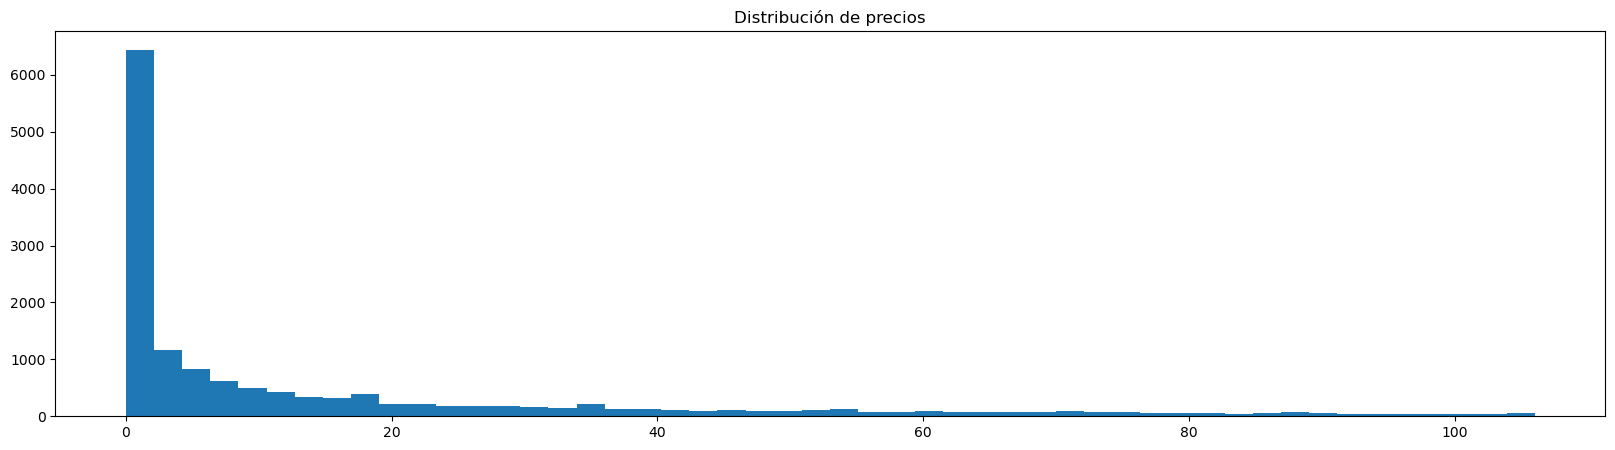

In [45]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["number_of_reviews"] <= (q3_r + 1.5 * iqr_reviews)]["number_of_reviews"], bins=50)
plt.title("Distribución de precios")
plt.plot()

## 4. Análisis bivariado

In [50]:
listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_rating,1.000000,0.850788,0.760891,0.701925,0.755693,0.591722,0.850828
review_scores_accuracy,0.850788,1.000000,0.731885,0.681141,0.711923,0.574394,0.809626
review_scores_cleanliness,0.760891,0.731885,1.000000,0.578483,0.596963,0.466959,0.704550
review_scores_checkin,0.701925,0.681141,0.578483,1.000000,0.731695,0.486209,0.645403
review_scores_communication,0.755693,0.711923,0.596963,0.731695,1.000000,0.525372,0.693154
review_scores_location,0.591722,0.574394,0.466959,0.486209,0.525372,1.000000,0.575726
review_scores_value,0.850828,0.809626,0.704550,0.645403,0.693154,0.575726,1.000000


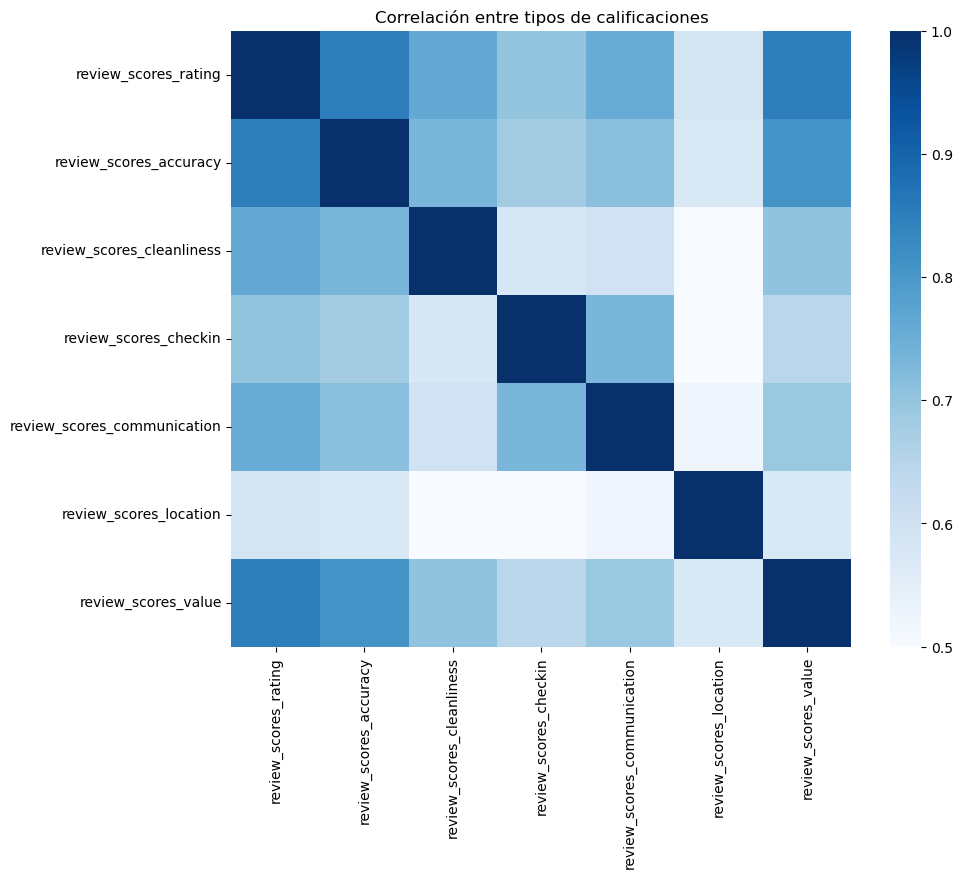

In [49]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlación entre tipos de calificaciones")
plt.show()

La anterior gráfica de correlación, nos permite determinar qué calificación es más importante o relevante para la calificación global. Según los valores de correlación, vemos que las calificaciones de "accuracy" y "value" son las que más correlación tienen con el rating.

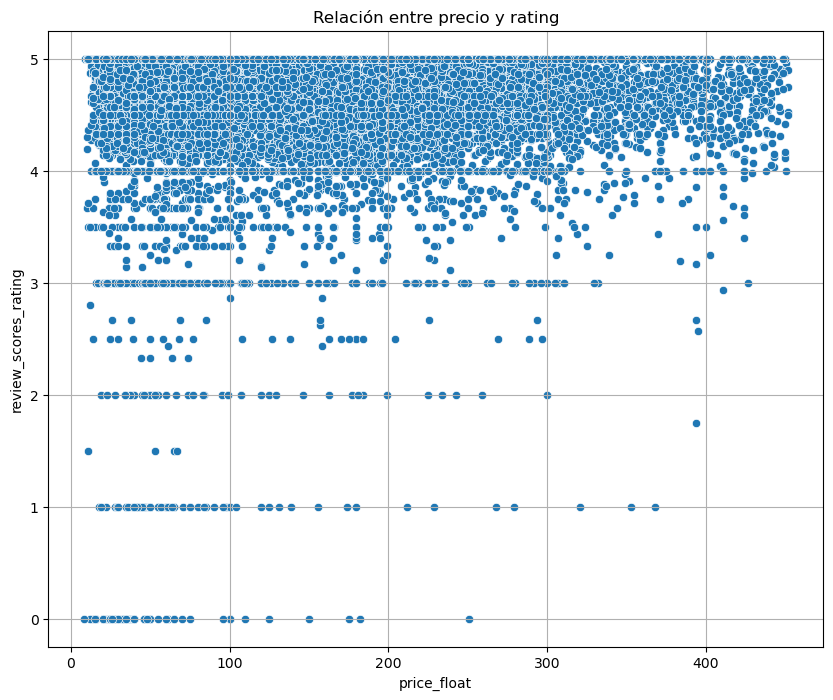

In [57]:
# Plotting the relationship between price and review score value
df_sin_outliers = listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=df_sin_outliers["price_float"],
    y=df_sin_outliers["review_scores_rating"]
)
plt.title("Relación entre precio y rating")
plt.grid()
plt.show()

El gráfico anteriror es útil para entender un poco la relación entre precio y calificación. A priori podríamos determinar que sin importar el precio, los usuarios tienden a otorgar buenas calificaciones a las prioridades. Para nuestro análisis, determinar lo anterior es muy importante, puesto que los inversores podrán invertir en propiedades de mayor valor o poner precios mayores, sin temor a que los usuarios no les vaya a gustar la propiedad.

In [68]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

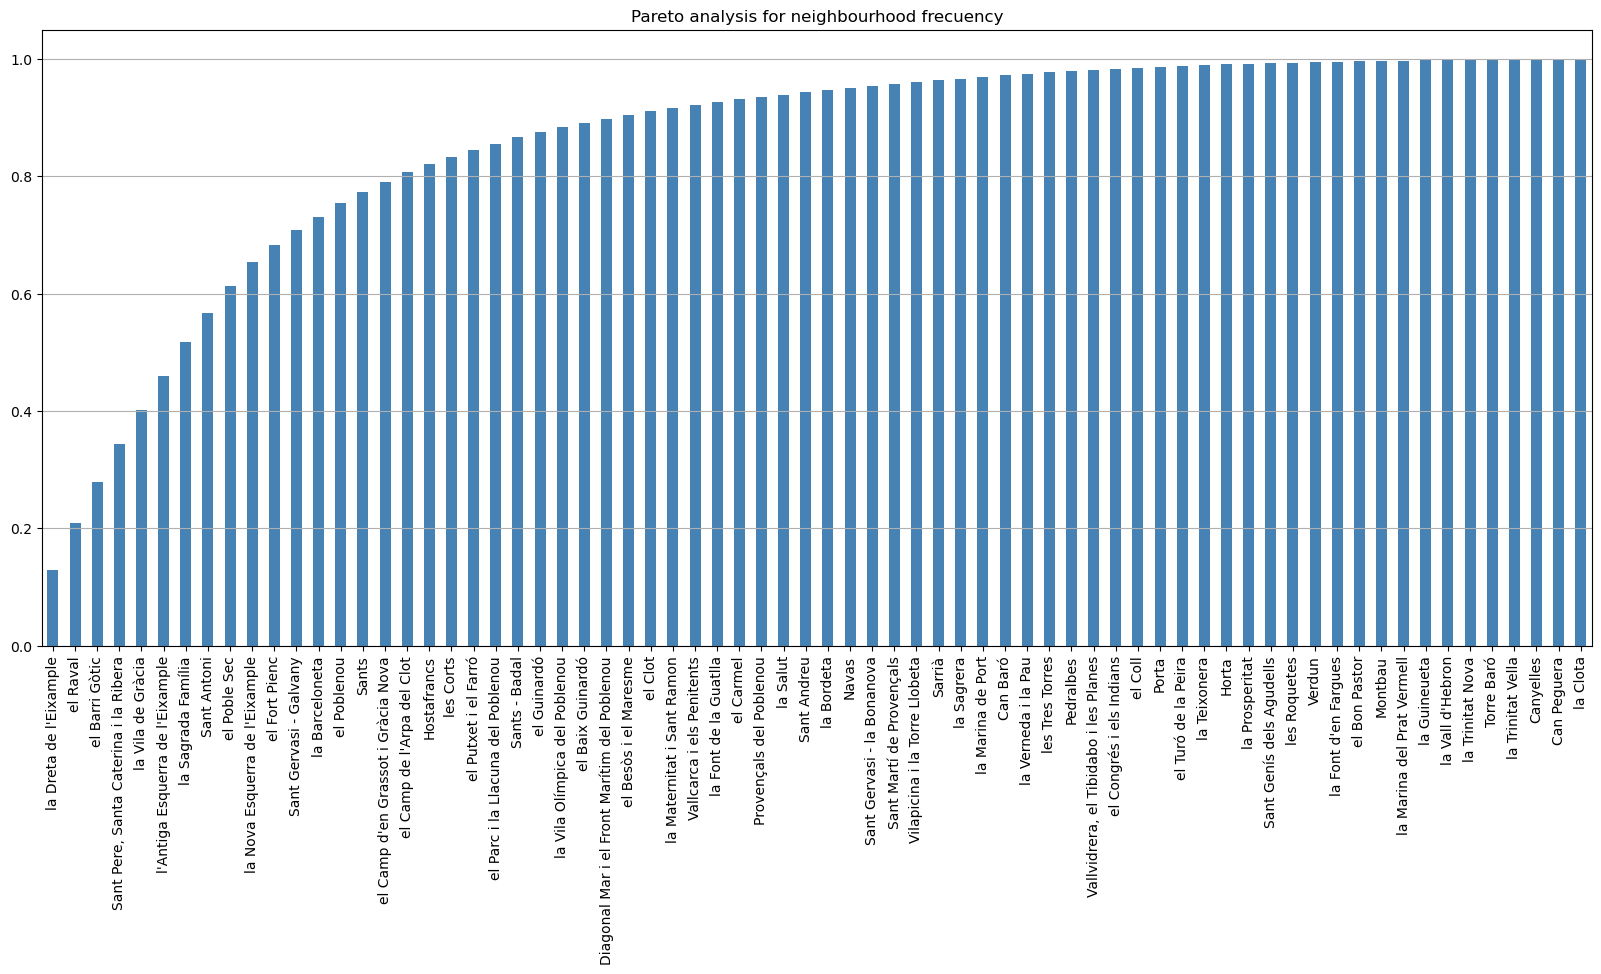

In [69]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [70]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

["la Dreta de l'Eixample",
 'el Raval',
 'el Barri Gòtic',
 'Sant Pere, Santa Caterina i la Ribera',
 'la Vila de Gràcia',
 "l'Antiga Esquerra de l'Eixample",
 'la Sagrada Família',
 'Sant Antoni',
 'el Poble Sec',
 "la Nova Esquerra de l'Eixample",
 'el Fort Pienc',
 'Sant Gervasi - Galvany',
 'la Barceloneta',
 'el Poblenou',
 'Sants',
 "el Camp d'en Grassot i Gràcia Nova"]

Dado que son muchos barrios los que hacen el pareto, a continuación haremos un análisis de frecuencia realtiva y escogeremos los barrios que superen por lo menos el 6% de la distribución

In [71]:
neighbourhood_frec = listings_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True)

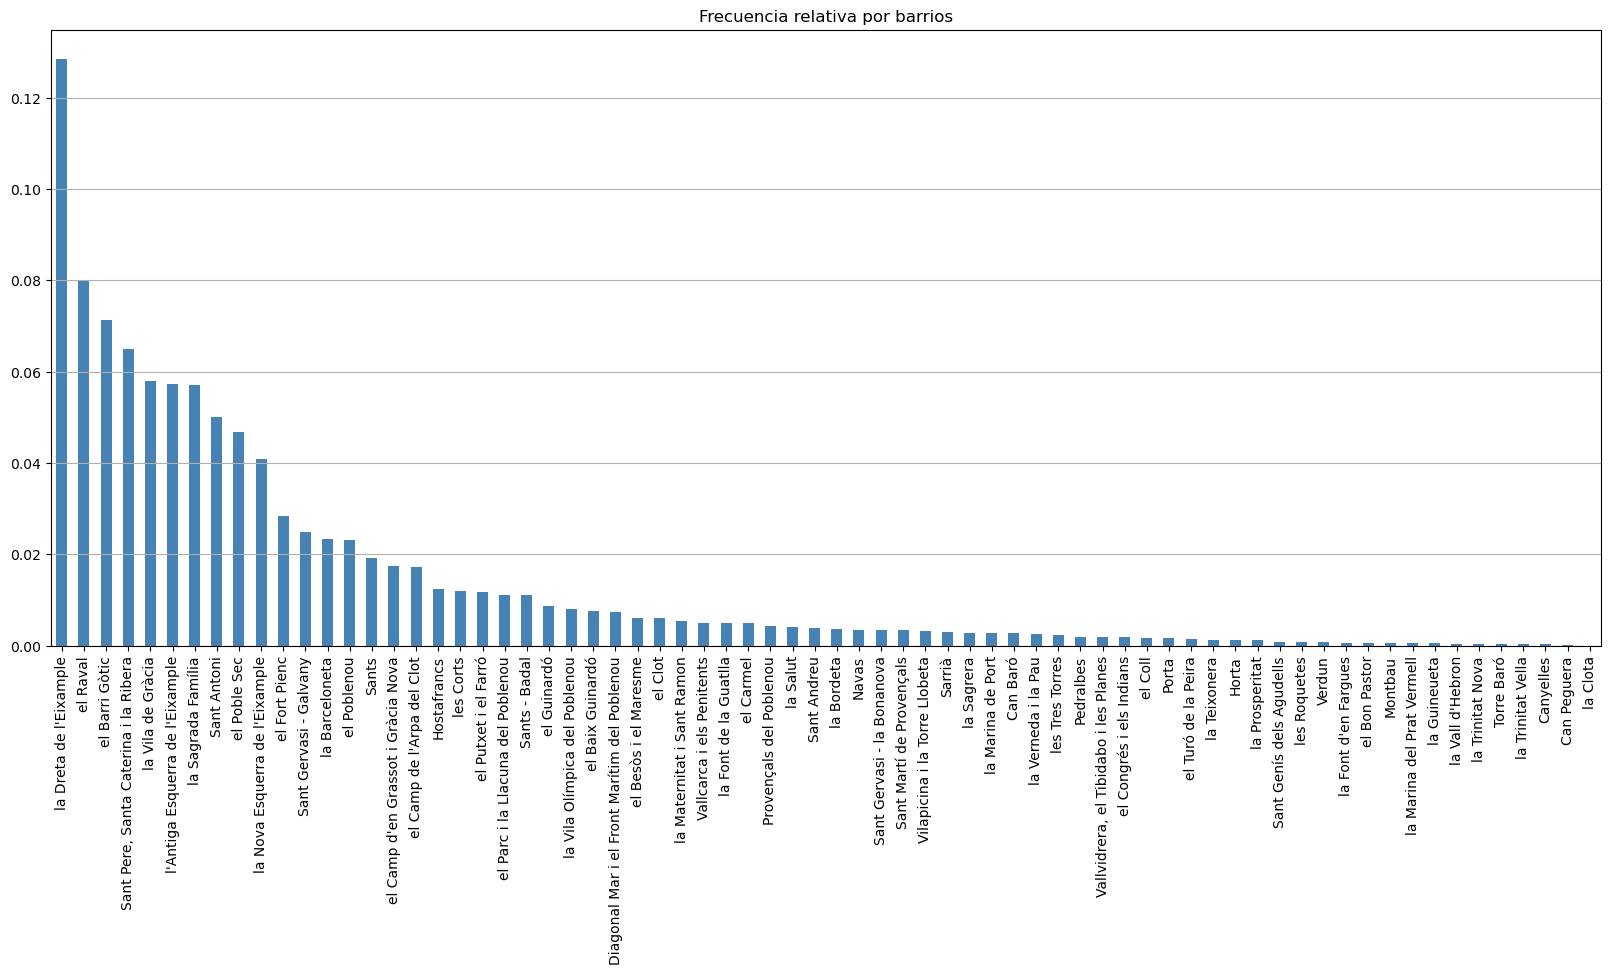

In [72]:
# Plotting relative frecuency for neighbourhood_cleansed
plt.figure(figsize=(20, 8))
neighbourhood_frec.plot(kind="bar", color="steelblue")
plt.title("Frecuencia relativa por barrios")
plt.grid(axis="y")
plt.show()

In [99]:
most_representative_neighbourhoods = neighbourhood_frec.loc[neighbourhood_frec >= 0.06].index.tolist()
most_representative_neighbourhoods

["la Dreta de l'Eixample",
 'el Raval',
 'el Barri Gòtic',
 'Sant Pere, Santa Caterina i la Ribera']

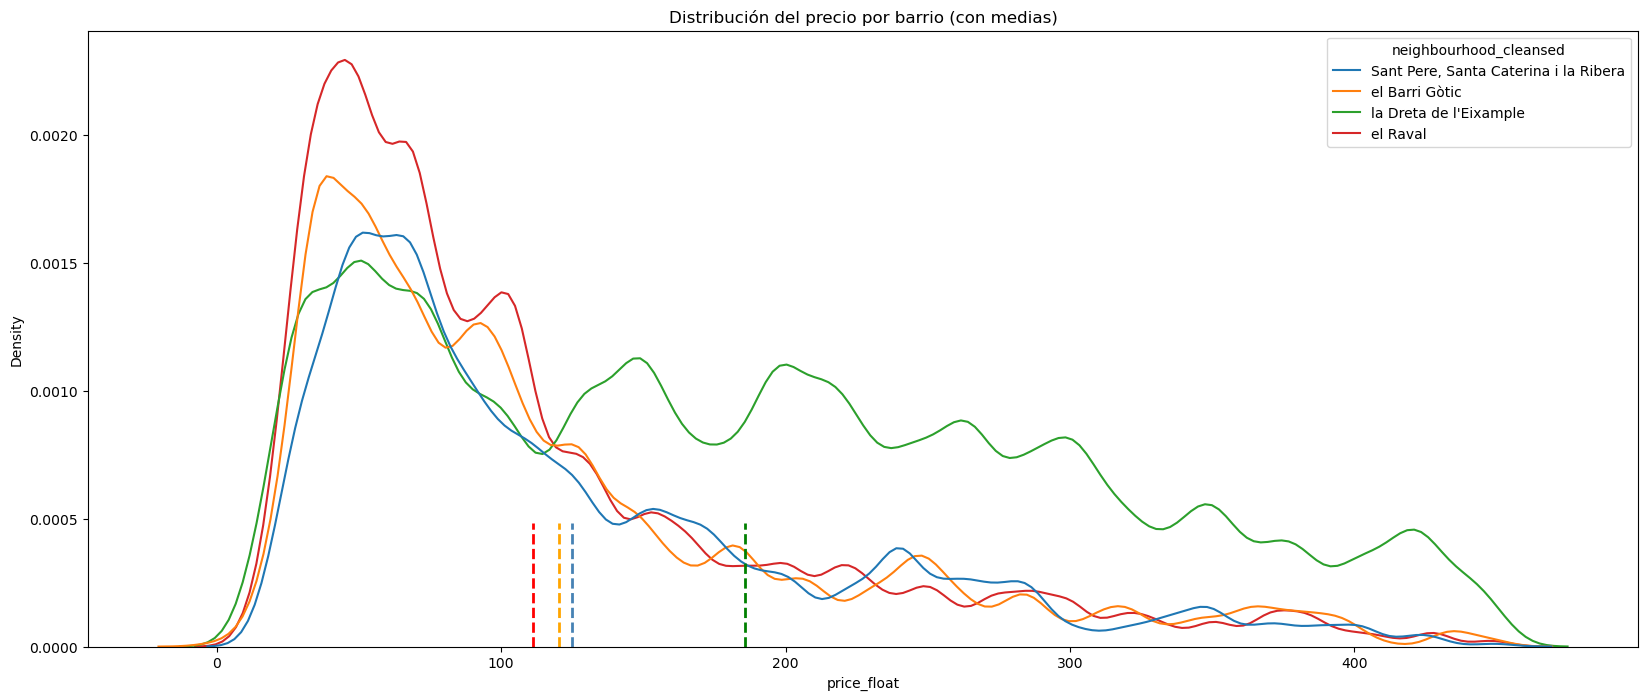

In [100]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["green", "red", "orange", "steelblue"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Distribución del precio por barrio (con medias)")
plt.show()

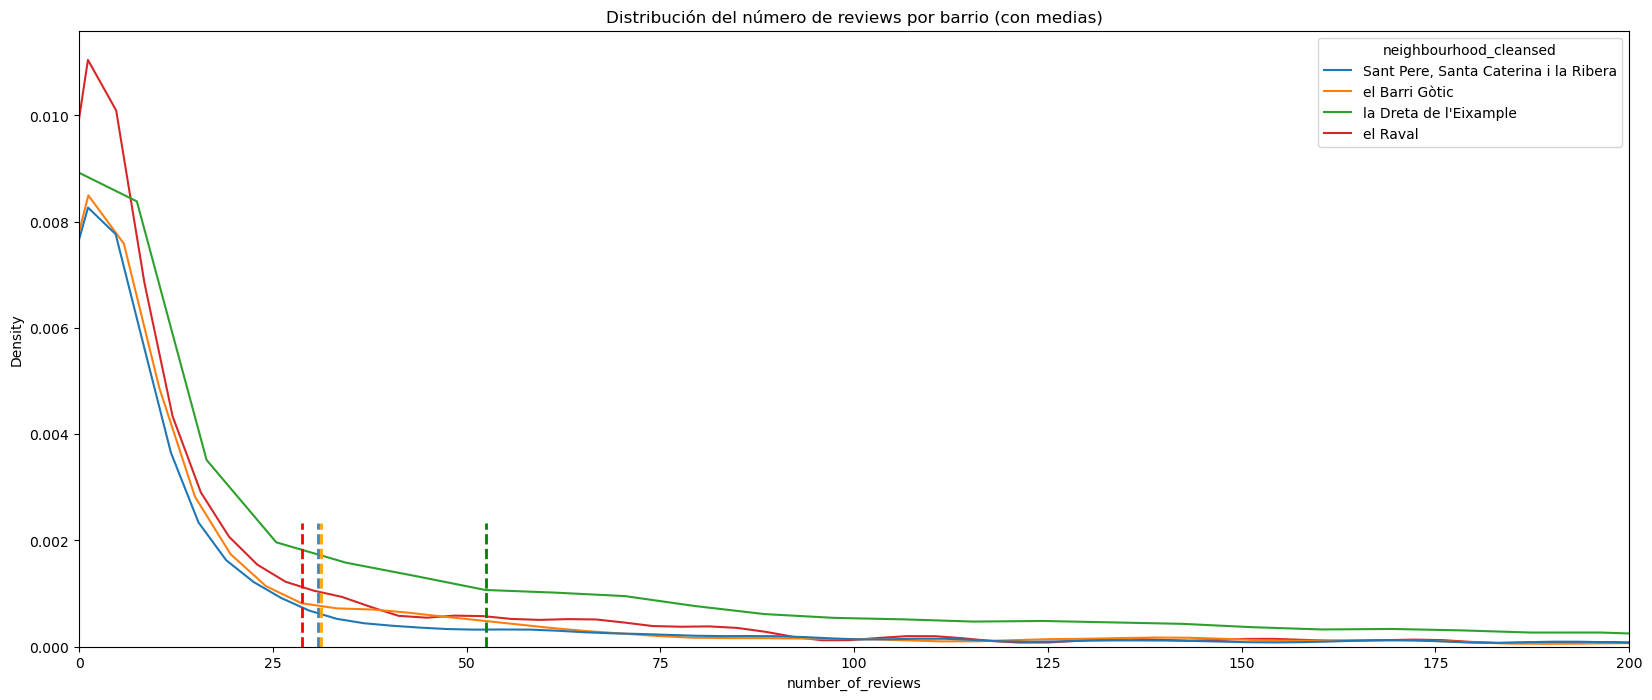

In [101]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["green", "red", "orange", "steelblue"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Distribución del número de reviews por barrio (con medias)")
plt.xlim([0, 200])
plt.show()

Tipo de habitación Entire home/apt: 176.92977906856134
Tipo de habitación Private room: 75.61794676806083
Tipo de habitación Hotel room: 220.1417910447761
Tipo de habitación Shared room: 53.773972602739725


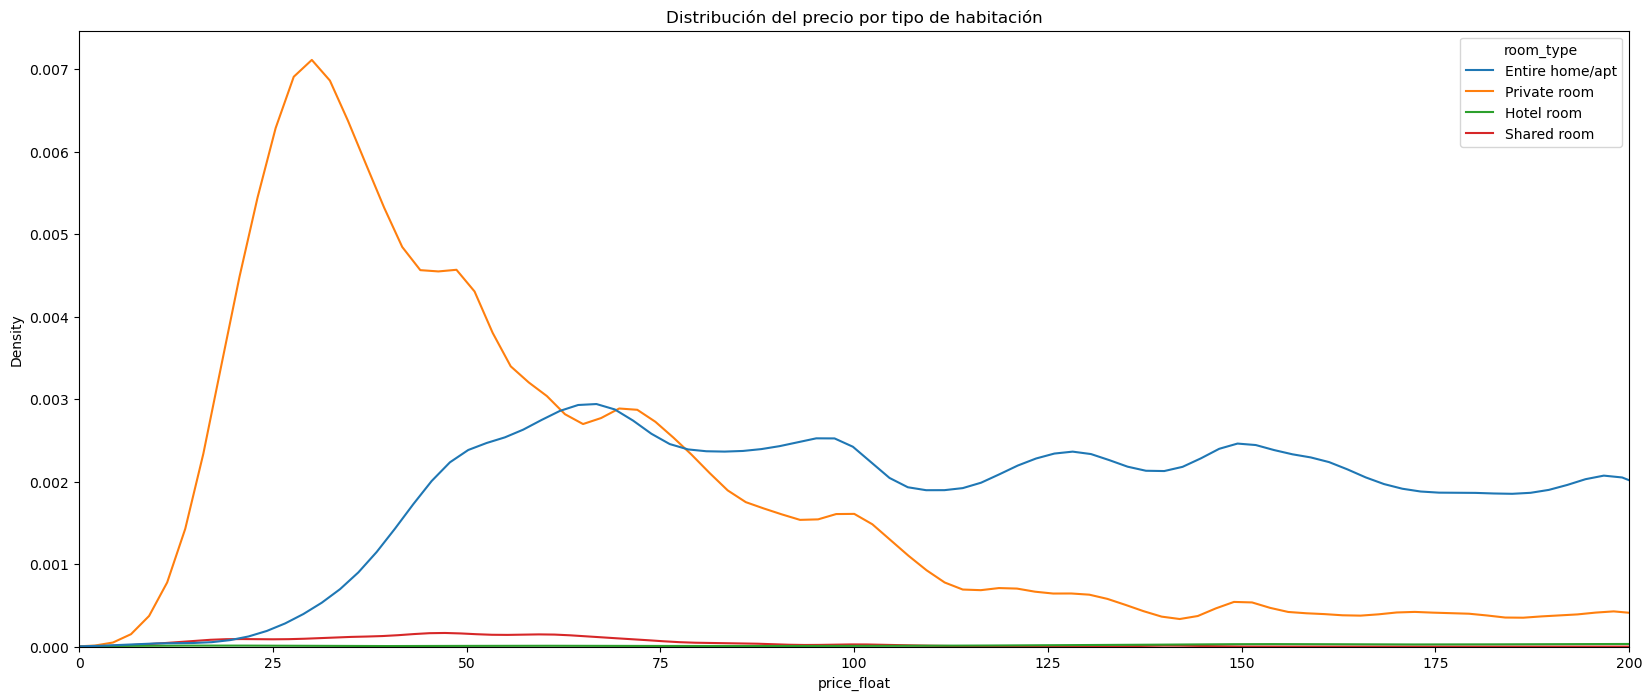

In [113]:
# Plotting number of reviews distribution by type of listing
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)],
    x="price_float",
    hue="room_type",
    bw_adjust=.3,
    ax=ax
)

rooms_type = listings_df["room_type"].unique().tolist()
                             
for room in rooms_type:
    media = listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["room_type"] == room, "price_float"].mean()
    print(f"Tipo de habitación {room}: {media}")
    
plt.title("Distribución del precio por tipo de habitación")
plt.xlim([0, 200])
plt.show()

In [112]:
listings_df["room_type"].unique().tolist()

['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']

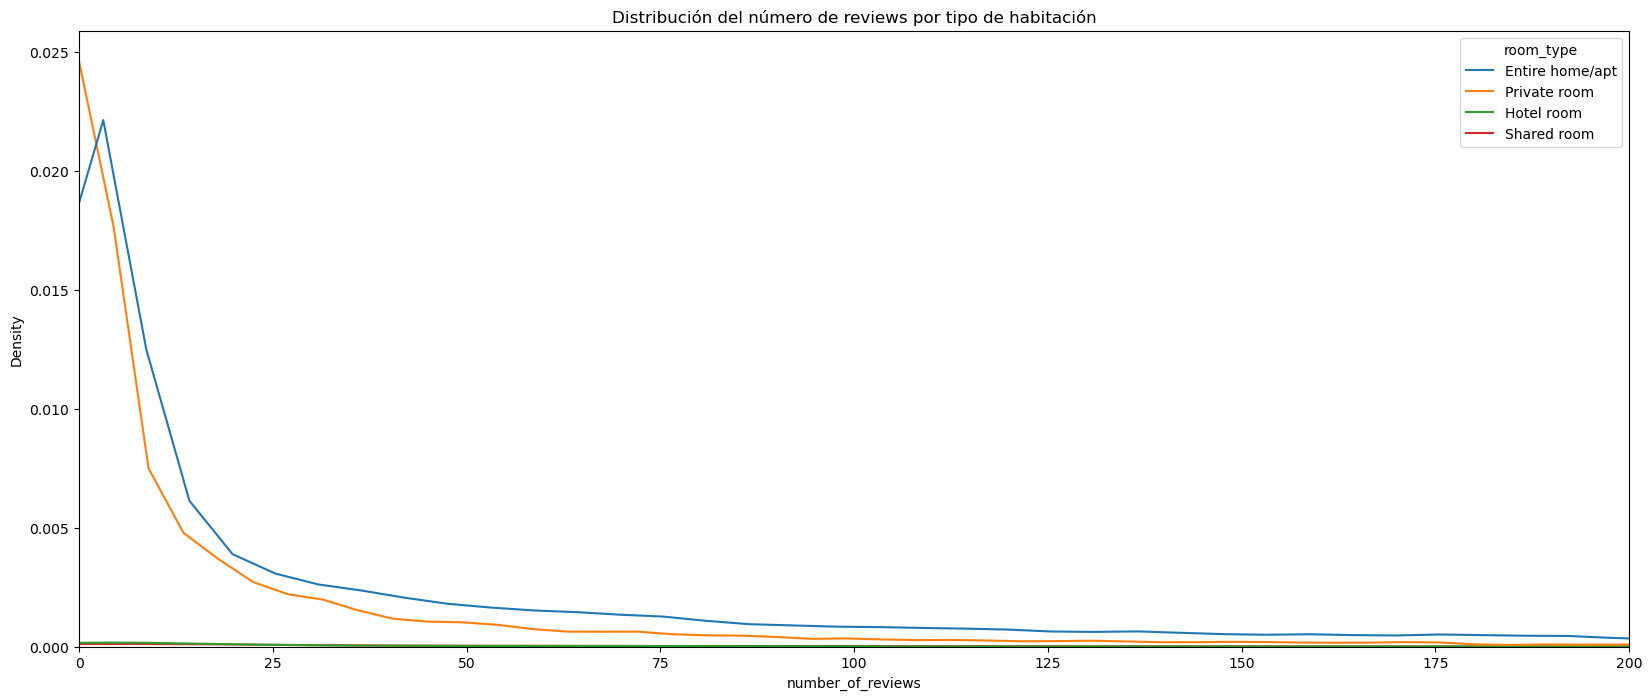

In [108]:
# Plotting number of reviews distribution by type of listing
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)],
    x="number_of_reviews",
    hue="room_type",
    bw_adjust=.3,
    ax=ax
)
plt.title("Distribución del número de reviews por tipo de habitación")
plt.xlim([0, 200])
plt.show()

In [102]:
most_representative_neighbourhoods = neighbourhood_frec.loc[neighbourhood_frec >= 0.05].index.tolist()
most_representative_neighbourhoods

["la Dreta de l'Eixample",
 'el Raval',
 'el Barri Gòtic',
 'Sant Pere, Santa Caterina i la Ribera',
 'la Vila de Gràcia',
 "l'Antiga Esquerra de l'Eixample",
 'la Sagrada Família',
 'Sant Antoni']

Barrio la Dreta de l'Eixample: 185.8915784165406
Barrio el Raval: 111.1014168530947
Barrio el Barri Gòtic: 120.45633561643835
Barrio Sant Pere, Santa Caterina i la Ribera: 124.90055762081785
Barrio la Vila de Gràcia: 140.02596053997922
Barrio l'Antiga Esquerra de l'Eixample: 156.9935760171306
Barrio la Sagrada Família: 156.8002114164905
Barrio Sant Antoni: 157.40740740740742


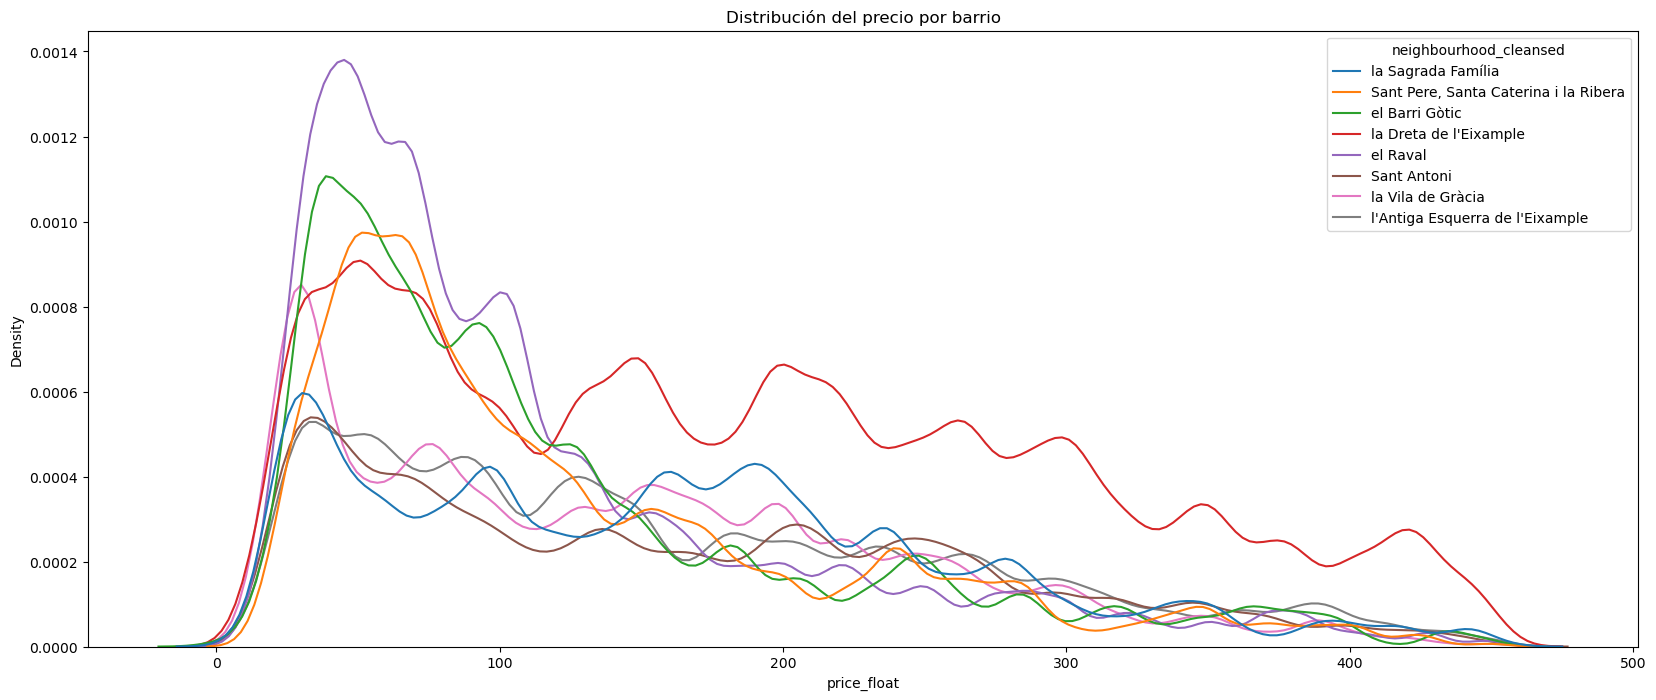

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)


for neighbourhood in most_representative_neighbourhoods:
    media = listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean()
    print(f"Barrio {neighbourhood}: {media}")
    
plt.title("Distribución del precio por barrio")
plt.show()